# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Task 1



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew

Loading file

In [2]:
df = pd.read_csv('food_claims_2212.csv')

First rows

In [4]:
df.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


Everything looks fine

Shape of file

In [5]:
df.shape

(2000, 8)

We can see that file contains 2000 rows and 8 columns

Information about data frame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


We can see that there are some missing values in Data Frame(36 for amount_paid and 26 for linked_cases)

Some aggregated stastistics

In [7]:
df.describe()

,claim_id,time_to_close,amount_paid,individuals_on_claim
count,2000.000000,2000.00000,1964.000000,2000.000000
mean,1000.500000,185.56800,21541.975183,8.049500
std,577.494589,49.16339,12530.156509,4.087347
min,1.000000,76.00000,1516.720000,1.000000
25%,500.750000,158.00000,10995.950000,4.000000
50%,1000.500000,179.00000,20105.700000,8.000000
75%,1500.250000,204.00000,30709.350000,12.000000
max,2000.000000,518.00000,52498.750000,15.000000


We can use unique() function to determine unique values for each column to investigate further into data frame.

In [8]:
col_names = df.columns
for i in col_names:
    print(df[i].unique())

[   1    2    3 ... 1998 1999 2000]
[317 195 183 186 138 190 149 180 208 175 223 265 235 229 189 204 129 167
 119 177 170 148 173 184 172 237 262 136 181 161 146 243 233 125 166 178
 111 168 301 192 250 185 140 248 196 130 179 290 215 182 159 105 188 109
 267 142 276 293 226 187 153 132 157 144 200 199 156 165 273 120 247 280
 238 134 176 359 160 355 297 245 126 127 108 218 118 102 143 133 227 214
 358 163 234 115 139 171 210 158 240 145 322 228 155 124 162 207 256 174
 194 131 212 246 169 230 217 292 345 219 225 164 152 203 213 137 197 261
 224 206 193 141 325 220 244 318 135 277 254  84 191 104 121 259 202 341
 198 231 232 211 275 110  76 222 257 113 499 274 216 270 205 221 299 260
 272 151  98 326 367 352 294  95 360 370 123 453 327 279 249 117 241 307
 384 147 419 310 209 285 316 106 286 122 253 116 268 320 107 101 201 281
 313 150 271 284 251 295 154  93 329 291 287 255 406 263 350 100 518  90
 264 300 306  96 242  97  92 128 282 304  91 114 112 338 283 396 236 278
 239  87 298 25

Besied missing values, there are some non-standarized values in the last column. Everything else looks fine

We will replace missing values in amount_paid with overall median amount paid.

In [9]:
overall_median = df['amount_paid'].median(skipna = True)
#overall median calculation

In [10]:
df['amount_paid'] = df['amount_paid'].fillna(overall_median)
#filling missing values

In [11]:
df['amount_paid'].isna().sum()
#final check

0

There are no more missing values in column amount_paid.

Let's get into linked_cases. We will replace missing values fith False

In [12]:
df['linked_cases'] = df['linked_cases'].fillna(False)
#filling Na values with False boolean

In [13]:
df['linked_cases'].isna().sum()
#final check

0

There are no more missing values in linked_cases

We can see that column cause have some non-standarized values and some that require trimming. We should take care of it.

In [14]:
df['cause'] = df['cause'].str.lower()
#standarizing according to requirements


In [15]:
df['cause'] = df['cause'].str.strip()
#deleting unnecessary spaces

In [16]:
df['cause'] = df['cause'].replace(['vegetables'],'vegetable')
#replacing vegetables with vegetable

In [17]:
df['cause'].unique()
#final check

array(['unknown', 'meat', 'vegetable'], dtype=object)

We can see that everything is fine now.

The original data is 2000 rows and 8 columns. After validation, there were 2000 rows remaining. The following describes what has been done to each column:

- **claim_id**: There were 2000 unique values,as expected
- **time_to_close**: Discrete. The number of days to close the claim. Any positive value,as expected.
- **claim_amount**:Continuous. The initial claim requested in the currency of Brazil,rounded to 2 decimal places, as expected
- **amount_paid**: Continuous. Final amount paid. In the currency of Brazil. Rounded to 2 decimal places. Missing values have been replaced with overall median, besides that everything as expected.
- **location**: Nominal. Location of the claim, one of “RECIFE”, “SAO LUIS”,
“FORTALEZA”, or “NATAL”. As expected.
- **individuals_on_claim**: Discrete. Number of individuals on this claim. Minimum 1 person. As expected
- **linked_cases**: Nominal. Whether this claim is linked to other cases. Either TRUE or FALSE. Missing values have been replaced with FALSE, everything else as expected.
- **cause** :Nominal. Cause of the food poisoning. One of “vegetable”, “meat”
or “unknown”. There were some unstandarized values which have been taken care of, everything else as expected.

## Task 2

Text(0.5, 1.0, 'Claim per location')

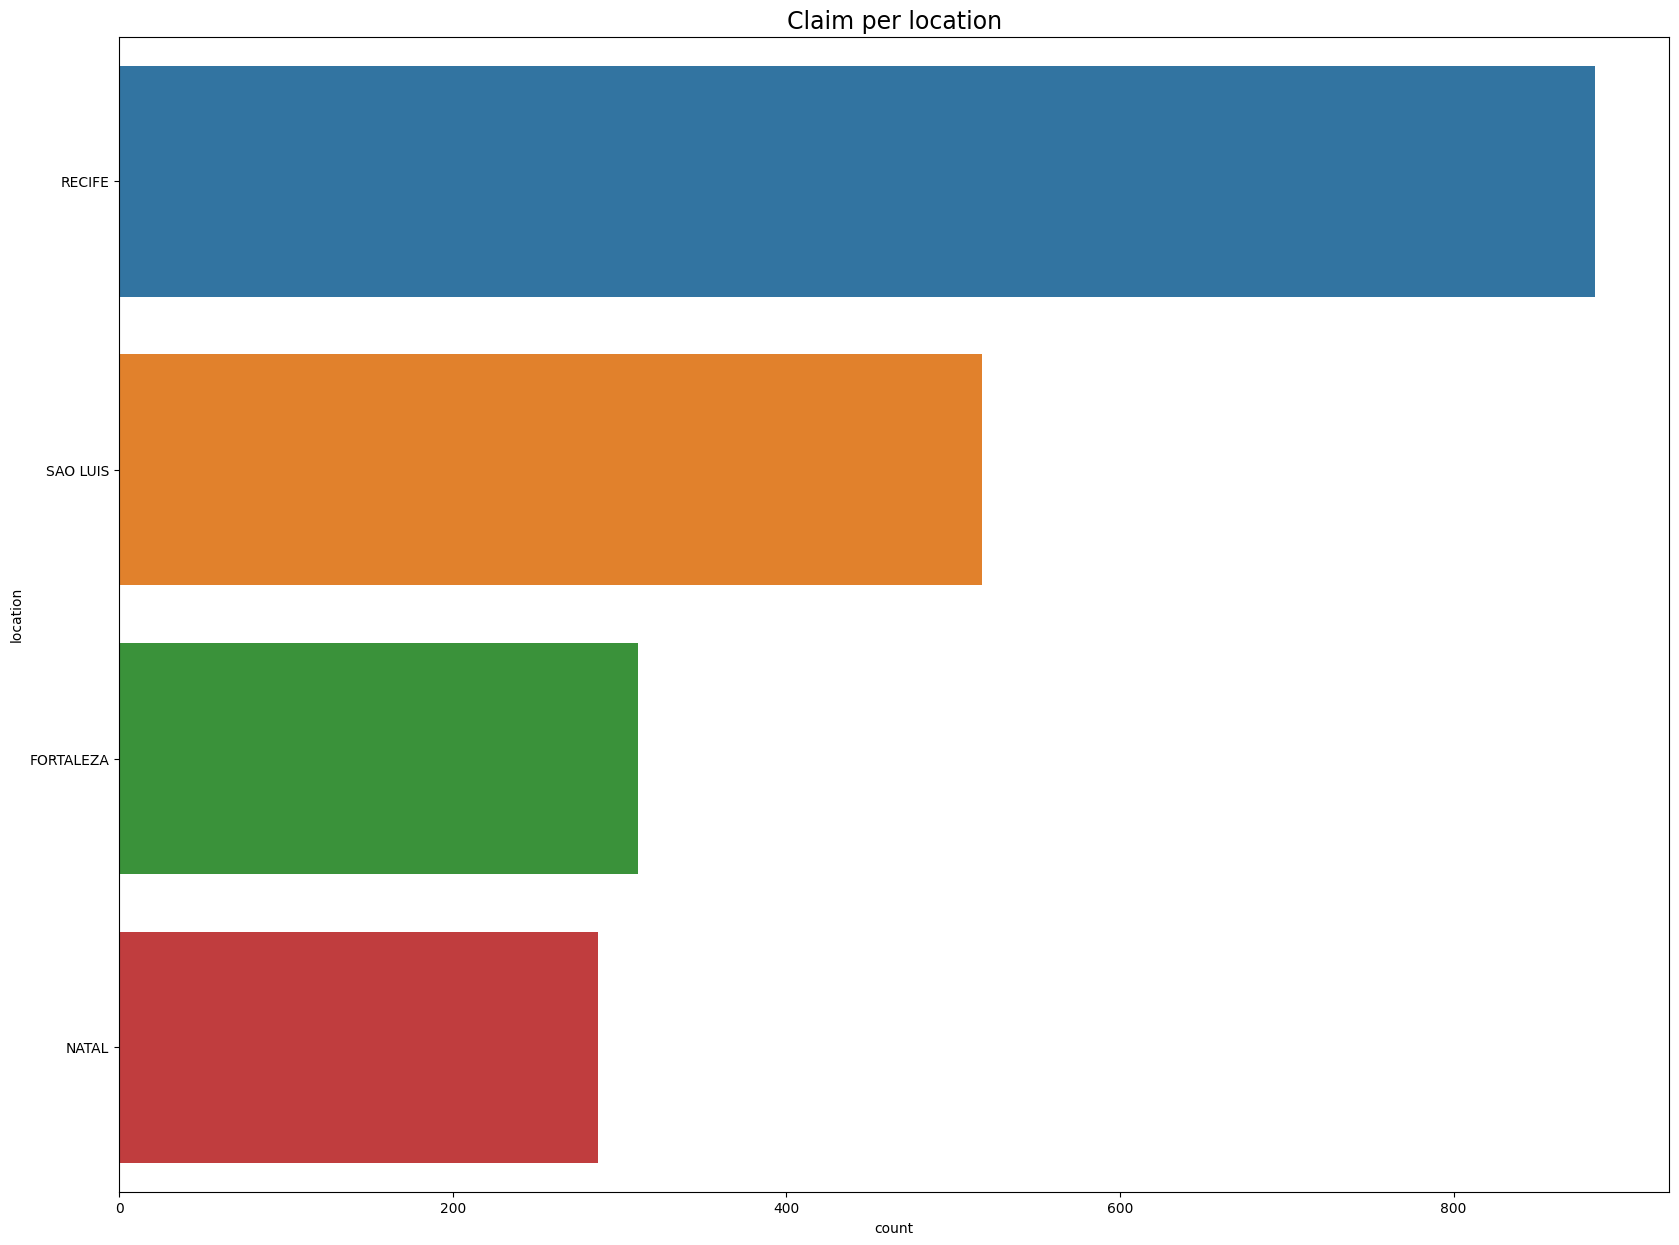

In [40]:
plt.subplots(figsize=(20,15))
count = df["location"].value_counts(ascending = False)
df_plat = df.filter(["location"], axis = 1)
df_plat['count'] = 1
df_plat
grouped_plat_genre = df_plat.groupby("location", as_index = False,sort= False).sum()
grouped_plat_genre.sort_index(ascending = False)
grouped_plat_genre= grouped_plat_genre.sort_values('count', ascending = False)
sns.barplot(data = grouped_plat_genre, x = "count", y = "location")
plt.title("Claim per location", fontsize = 17)

a) _Recife_ is **locatio**n with biggest number of observations
b) The observations are not balanced across categories, _Recife_ stands out very much, _Sao Luis_ also, only _Natal_ and _Fortaleza_ are fairly balanced

## Task 3

[Text(0.5, 1.0, 'Distribution of time_to_close')]

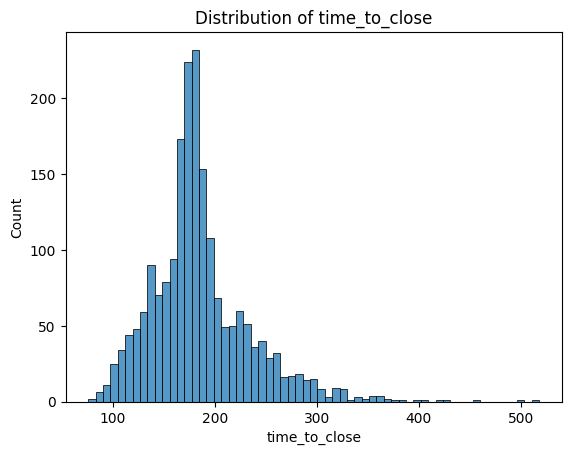

In [20]:
sns.histplot(data = df, x = "time_to_close").set(title = 'Distribution of time_to_close')
#creating histogram to inspect distribution

In [21]:
print(kurtosis(df['time_to_close'], fisher=False)), print(skew(df['time_to_close']))
#calculating kurtosis and skewness

6.813654752020035
1.2927725837263404


(None, None)

We can see that the distribution of the **time_to_close** kinda reminds the normal distribution with some of the outliers. Positive kurtosis indicate that we have many outliers. The skewness is positive, which means the distribution is right-skewed, which means the most extreme values of **time_to_close** are on the right side.

## Task 4

We have to convert **location** datatype to categorical in order to inspect correlation

In [22]:
df_with_category =df.copy()
#copying data frame so it won't mess our previous work

In [23]:
df_with_category['location']=df_with_category['location'].astype('category').cat.codes

[Text(0.5, 1.0, 'Correlation Heatmap')]

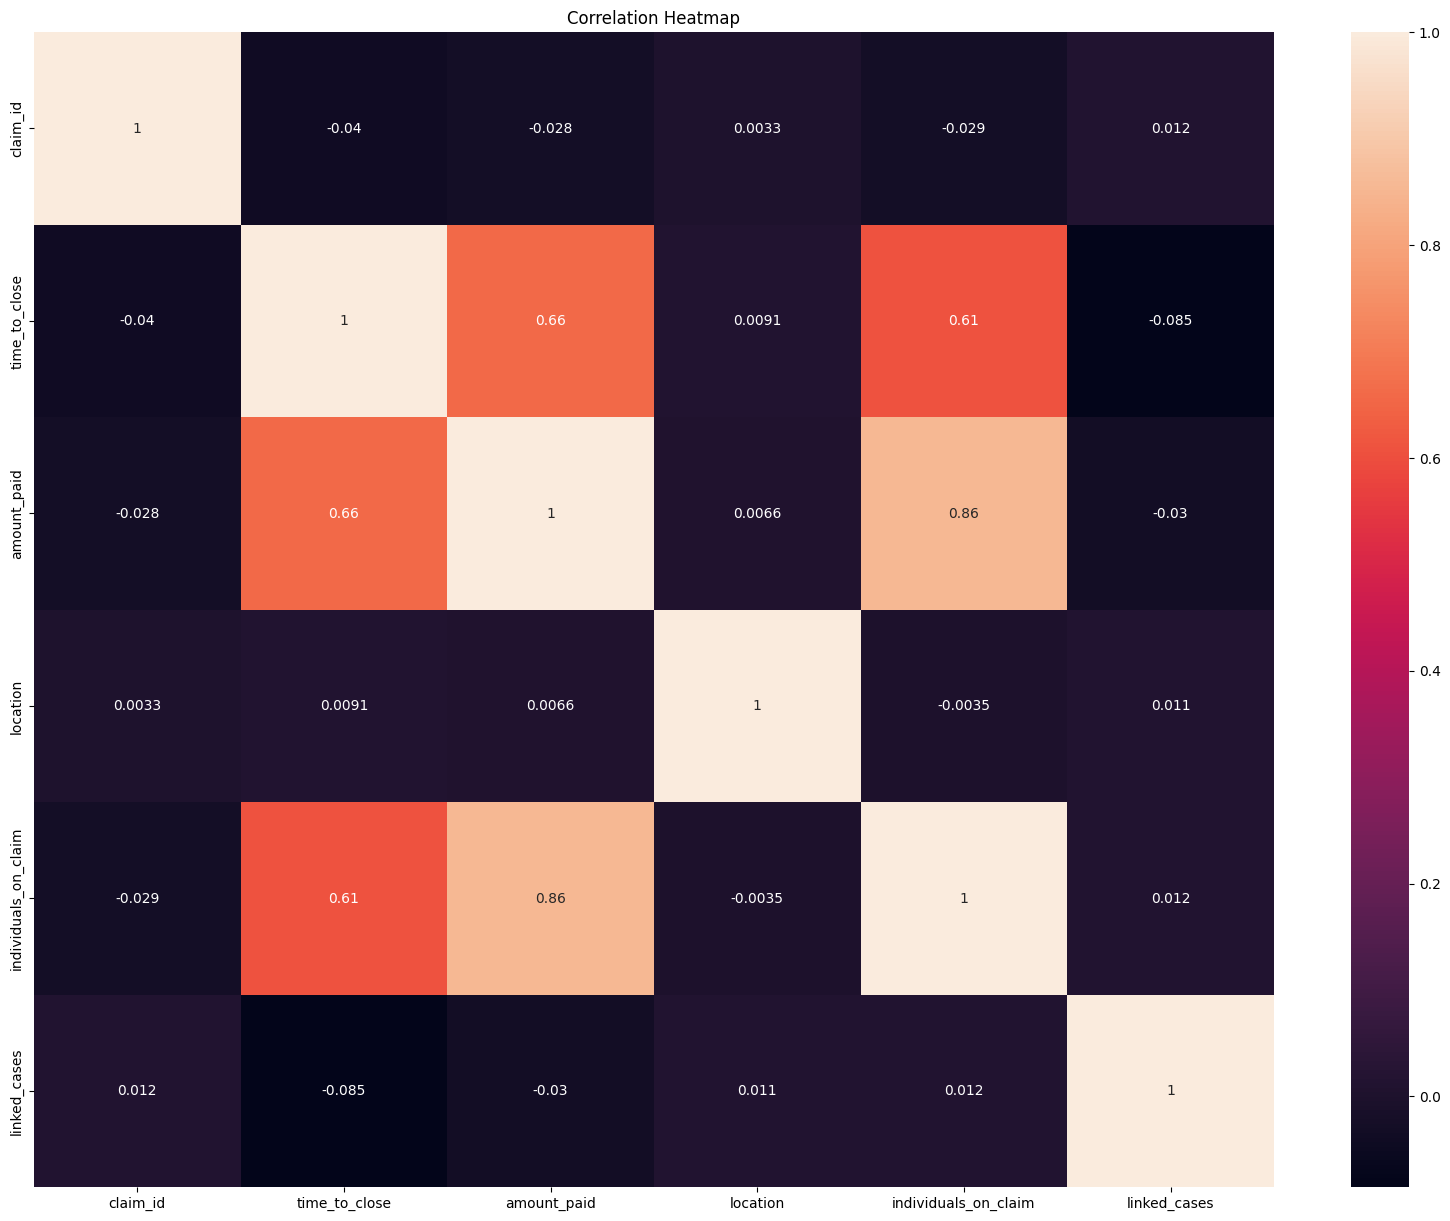

In [24]:
plt.subplots(figsize=(20,15))
sns.heatmap(df_with_category.corr(),annot=True,robust = True).set(title = 'Correlation Heatmap')

Correlation is very small so there is no relationships between **time_to_close** and **location**